# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Importing dataset

In [13]:
def read_data():
    data = pd.read_excel("C:/Users/vinot/OneDrive/Desktop/KOWSALYA DATA SCIENCE/Salary_Data.xlsx")
    return data
df = read_data()

In [15]:
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


# EDA

In EDA, we will perform Business moments, Null values, Data types, Correlation plots, Distribution plots for each columns and Boxplots.

### Business Moments

Finding the business moments of the data - Mean, Median, Mode, Variance, Standard deviation.

In [27]:
np.mean(df, axis=0)

YearsExperience        5.313333
Salary             76003.000000
dtype: float64

In [23]:
np.median(df)

18870.75

In [29]:
np.var(df, axis=0)

YearsExperience    7.785156e+00
Salary             7.264993e+08
dtype: float64

In [33]:
np.std(df, axis=0)

YearsExperience        2.790189
Salary             26953.650249
dtype: float64

In [35]:
from scipy import stats

stats.mode(df)

ModeResult(mode=array([3.2000e+00, 3.7731e+04]), count=array([2., 1.]))

### Null values and Data types

To see whether the data has any null values and fixing it.

In [41]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [43]:
df.dtypes

YearsExperience    float64
Salary               int64
dtype: object

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 612.0 bytes


In [47]:
df.describe()    #Finds Min, Max, and the 25%, 50% and 75% of the data.

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


### Correlation

Finds correlation between two variables

In [51]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


### Correaltion plot

Heatmaps are very useful to find relations between two variables in a dataset.

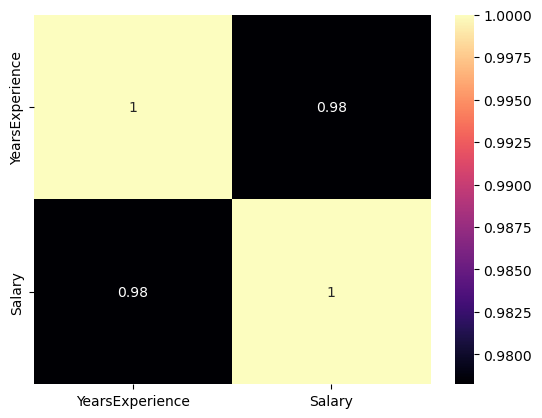

In [55]:
# 1. Heatmap

sns.heatmap(df.corr(), annot = True, cmap = 'magma')
plt.show()



We can see that both the feature and the label of our dataset are positively correlated with each other.

### Distribution of the dataset

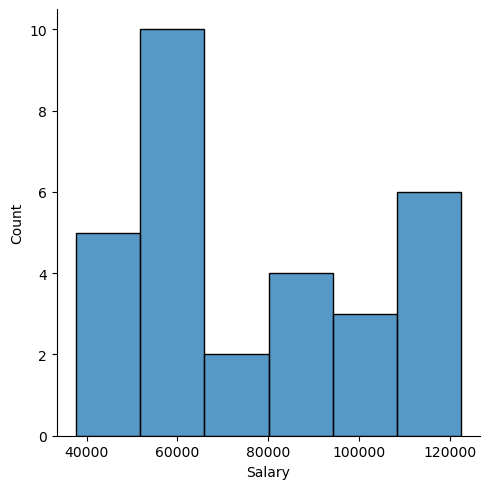

In [59]:
import seaborn as sns
sns.displot(df['Salary'])

<Axes: xlabel='YearsExperience', ylabel='Count'>

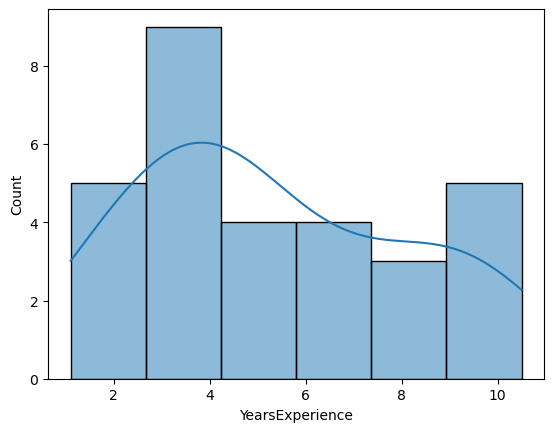

In [67]:
import seaborn as sns
sns.histplot(df['YearsExperience'],kde=True)

Both the feature and label is not distributed normally. We will apply some transformation further.

<Axes: ylabel='Salary'>

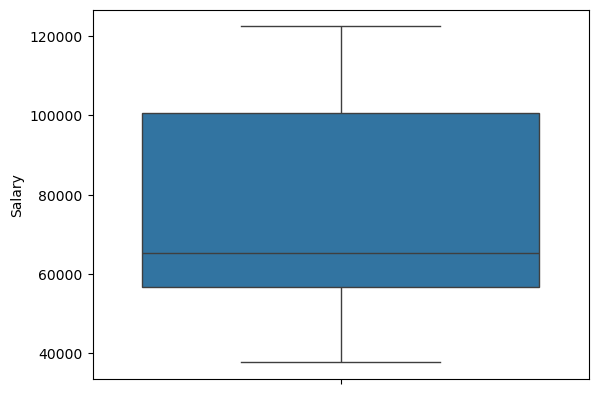

In [70]:
sns.boxplot(df['Salary'])

<Axes: ylabel='YearsExperience'>

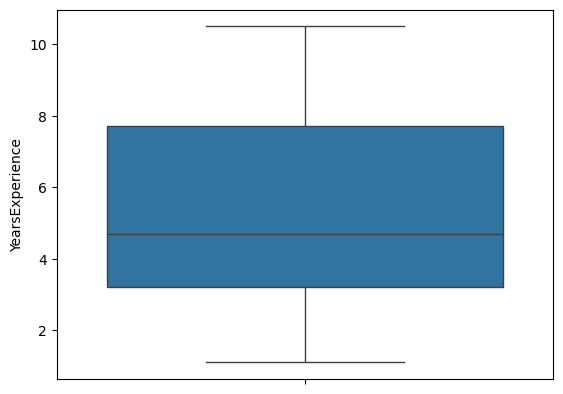

In [72]:
sns.boxplot(df['YearsExperience'])

# Model 1: Linear Regression with statsmodel

In [75]:
import statsmodels.formula.api as smf
model = smf.ols("Salary ~ YearsExperience", data=df).fit()

<Axes: xlabel='YearsExperience', ylabel='Salary'>

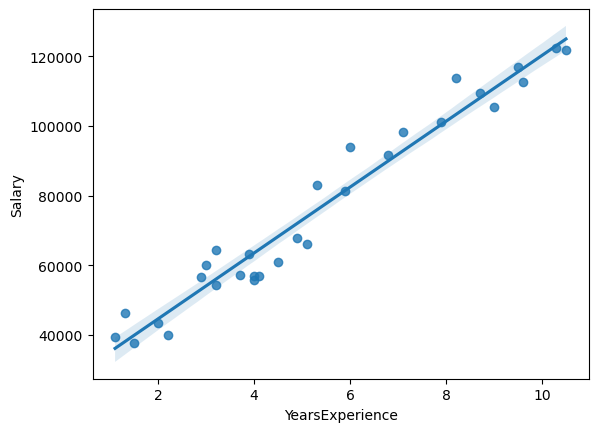

In [79]:
sns.regplot(x="YearsExperience", y="Salary", data=df)

In [81]:
#Coefficients
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [83]:
#t and p values
print(model.tvalues, '\n', '\n', model.pvalues)

Intercept          11.346940
YearsExperience    24.950094
dtype: float64 
 
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [85]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

### Predict for new data point

In [185]:
newdata=pd.Series([5])

In [187]:
data_pred=pd.DataFrame(newdata,columns=['YearsExperience'])

In [189]:
model.predict(data_pred)

0    73042.011806
dtype: float64

# Model 2: Log Transformation

In [99]:
#Splitting
X = df.iloc[:,:-1]
y = df.iloc[0:,1]

In [101]:
lreg = np.log(X)

In [103]:
lreg.head()

,YearsExperience
0,0.095310
1,0.262364
2,0.405465
3,0.693147
4,0.788457


In [105]:
model2 = smf.ols("Salary ~ lreg", data=df).fit()

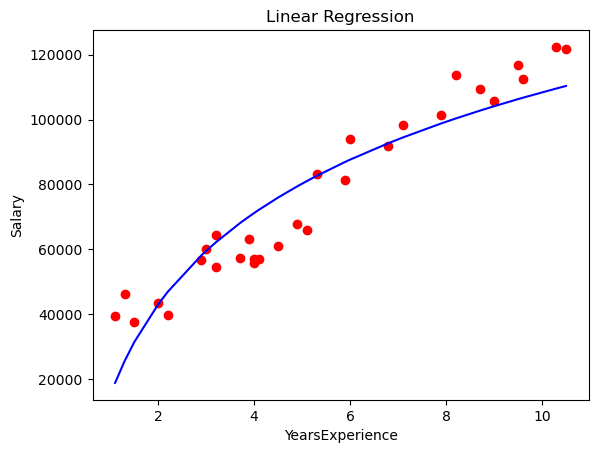

In [107]:
plt.scatter(X, y, color = 'red')
plt.plot(X,model2.predict(lreg), color='blue')
plt.title("Linear Regression")
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.show()

In [109]:
#Coefficients
model2.params

Intercept    14927.97177
lreg         40581.98796
dtype: float64

In [111]:
#t and p values
print(model2.tvalues, '\n', '\n', model2.pvalues)

Intercept     2.895135
lreg         12.791989
dtype: float64 
 
 Intercept    7.268813e-03
lreg         3.250155e-13
dtype: float64


In [113]:
#R squared values
(model2.rsquared,model2.rsquared_adj)

(0.853888882875697, 0.8486706286926862)

### Prediction for new data point with Model 2

In [116]:
newdata2=pd.Series([5])

In [118]:
data_pred2=pd.DataFrame(newdata2,columns=['lreg'])

In [120]:
model2.predict(data_pred2)

0    217837.911569
dtype: float64

# Model 3: Sqrt transformation

In [123]:
Sreg = np.sqrt(X)

In [125]:
Sreg.head()

,YearsExperience
0,1.048809
1,1.140175
2,1.224745
3,1.414214
4,1.483240


In [127]:
model3 = smf.ols("Salary ~ Sreg", data=df).fit()

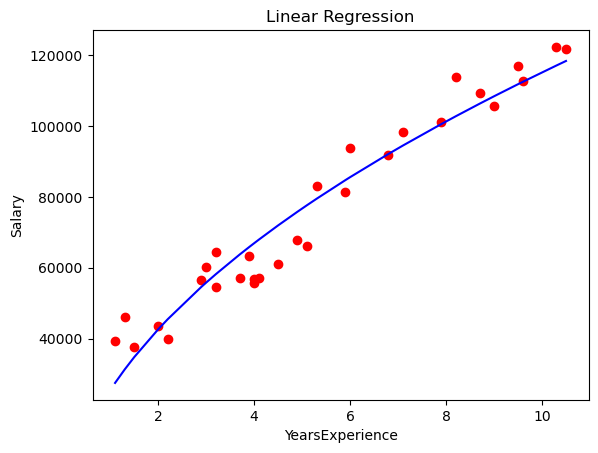

In [129]:
plt.scatter(X, y, color = 'red')
plt.plot(X,model3.predict(Sreg), color='blue')
plt.title("Linear Regression")
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.show()

In [131]:
#Coefficients
model3.params

Intercept   -16055.769117
Sreg         41500.680583
dtype: float64

In [133]:
#t and p values
print(model3.tvalues, '\n', '\n', model3.pvalues)

Intercept    -3.262308
Sreg         19.437148
dtype: float64 
 
 Intercept    2.906965e-03
Sreg         8.565358e-18
dtype: float64


In [135]:
#R squared values
(model3.rsquared,model3.rsquared_adj)

(0.9310009544993526, 0.9285367028743294)

### Prediction for a new data point with Model 3

In [138]:
newdata3=pd.Series([5])

In [140]:
data_pred3=pd.DataFrame(newdata3,columns=['Sreg'])

In [142]:
model3.predict(data_pred3)

0    191447.633798
dtype: float64

# Model 4: Sklearn model

In [285]:
# Splitting the dataset
X = df.iloc[:, :-1].values.reshape(-1,1) # Features (Reshaped to 2D array)
y = df.iloc[0:, 1].values.reshape(-1, 1)  # Output (Reshaped to 2D array)

In [287]:
# Step 2 : Split data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state = 0)

In [289]:
# Step 3 : Fit Simple Linear Regression to Training data
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [291]:
# Step 4 : Make Prediction
y_pred = regressor.predict(X_test)

# Visualizing the training set

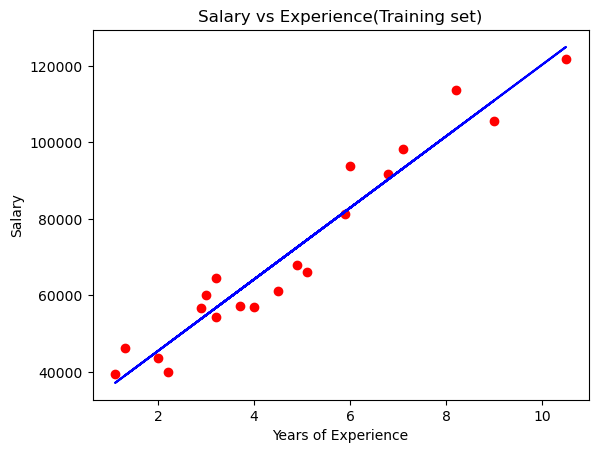

In [293]:
import matplotlib.pyplot as plt
# plot the actual data points of training set
plt.scatter(X_train, y_train, color = 'red')
# plot the regression line
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Salary vs Experience(Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

# Visualizing the test set

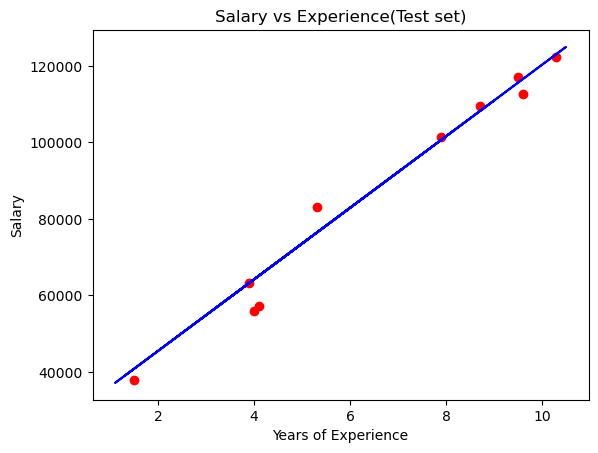

In [295]:
# Step 6 : Visualize test set results
import matplotlib.pyplot as plt
# plot the actual data points of test set
plt.scatter(X_test, y_test, color = 'red')
# plot the regression line (same as above)
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Salary vs Experience(Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [297]:
from sklearn.metrics import r2_score

#R squared values
print(f'r_sqr value: {regressor.score(X_train, y_train)}')

r_sqr value: 0.9381900012894278


# Make new predictions

In [299]:
# Step 7 - Make new prediction

new_salary_pred4 = regressor.predict([[5]])

print('Predicted salary is: ', new_salary_pred4)

Predicted salary is:  [[73545.90445964]]


In [301]:
# Predicting all the salaries
# Predicting the Test set results
new_salary_pred4 = regressor.predict(X_test)
print('Prediicted salaries are: ', new_salary_pred4)

Prediicted salaries are:  [[ 40835.10590871]
 [123079.39940819]
 [ 65134.55626083]
 [ 63265.36777221]
 [115602.64545369]
 [108125.8914992 ]
 [116537.23969801]
 [ 64199.96201652]
 [ 76349.68719258]
 [100649.1375447 ]]


# R square and Predicted values for Model 1, Model 2, Model 3 and Model 4.
- R square values of 95%, 85% and 93% for Model with different transformations.
- We also got Predicted Salary with 5 years of experience as: __73042__, __217837__, __191447__, __73545__.